In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.set_option('display.max_columns', 999)

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow_core.estimator import inputs
from tensorflow import feature_column
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
def normalize_and_encode(dataframe):
    column_names_to_not_normalize = ['result']
    column_names_to_normalize = [x for x in list(dataframe) if x not in column_names_to_not_normalize ]
    x = dataframe[column_names_to_normalize].values
    x_scaled = preprocessing.normalize(x)
    df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = dataframe.index)
    dataframe[column_names_to_normalize] = df_temp

    le = preprocessing.LabelEncoder()
    le.fit([ "H", "A", "D"])
    dataframe.loc[:,['result']]=le.transform(dataframe['result'])
    
    return dataframe

def get_X_and_y(dataframe):
    X = dataframe.drop(columns=['result']).values
    y = dataframe[['result']].values
    return X,y

df01 = pd.read_csv('../data/sliding01.csv', sep=',', index_col=0)
df02 = pd.read_csv('../data/sliding02_shots.csv', sep=',', index_col=0)
df03 = pd.read_csv('../data/sliding03_shots_extra.csv', sep=',', index_col=0)
df04 = pd.read_csv('../data/sliding03_shots_extra.csv', sep=',', index_col=0)

n01 = normalize_and_encode(df01)
n02 = normalize_and_encode(df02)
n03 = normalize_and_encode(df03)

train01, test01 = train_test_split(n01, test_size=0.1)
print(len(train01), 'train examples')
print(len(test01), 'test examples')

train02, test02 = train_test_split(n02, test_size=0.1)
print(len(train02), 'train examples')
print(len(test02), 'test examples')

train03, test03 = train_test_split(n03, test_size=0.1)
print(len(train03), 'train examples')
print(len(test03), 'test examples')


train_X01,train_y01 = get_X_and_y(train01)
train_X02,train_y02 = get_X_and_y(train02)
train_X03,train_y03 = get_X_and_y(train03)

test_X01,test_y01 = get_X_and_y(test01)
test_X02,test_y02 = get_X_and_y(test02)
test_X03,test_y03 = get_X_and_y(test03)

18740 train examples
2083 test examples
6329 train examples
704 test examples
6329 train examples
704 test examples


In [3]:
n01

result  odds-home  odds-draw  odds-away  home-wins  home-draws  \
0           2   0.049957   0.165301   0.330601   0.183667    0.110200   
1           1   0.077897   0.103862   0.121172   0.103862    0.138483   
2           1   0.109311   0.117119   0.105407   0.195198    0.078079   
3           0   0.068789   0.117049   0.155945   0.180075    0.108045   
4           2   0.108097   0.154424   0.205899   0.102949    0.205899   
...       ...        ...        ...        ...        ...         ...   
20818       2   0.162536   0.123527   0.055262   0.097521    0.065014   
20819       2   0.061498   0.110696   0.113771   0.092247    0.092247   
20820       2   0.073697   0.153535   0.184242   0.122828    0.163770   
20821       2   0.044350   0.175065   0.300111   0.066691    0.100037   
20822       2   0.055791   0.140313   0.175391   0.200447    0.033408   

       home-losses  home-goals  home-opposition-goals  away-wins  away-draws  \
0         0.073467    0.514268               0.367334   0.073467    0.073467   
1         0.103862    0.553931               0.415448   0.138483    0.103862   
2         0.117119    0.390396               0.312317   0.156158    0.156158   
3         0.072030    0.648271               0.396166   0.108045    0.108045   
4         0.205899    0.308848               0.463272   0.051475    0.308848   
...            ...         ...                    ...        ...         ...   
20818     0.162536    0.260057               0.487607   0.065014    0.130029   
20819     0.122995    0.307489               0.584228   0.030749    0.122995   
20820     0.122828    0.409426               0.368484   0.204713    0.081885   
20821     0.166729    0.400149               0.466840   0.100037    0.100037   
20822     0.100223    0.334078               0.267263   0.133631    0.033408   

       away-losses  away-goals  away-opposition-goals  
0         0.220401    0.293868               0.514268  
1         0.103862    0.484690               0.415448  
2         0.078079    0.585594               0.507514  
3         0.144060    0.360151               0.396166  
4         0.154424    0.360322               0.514746  
...            ...         ...                    ...  
20818     0.130029    0.325071               0.682650  
20819     0.153744    0.215242               0.645726  
20820     0.122828    0.614139               0.368484  
20821     0.133383    0.366803               0.533532  
20822     0.167039    0.467709               0.668156  

[20823 rows x 14 columns]

In [4]:
n02

result  odds-home  odds-draw  odds-away  home-wins  home-draws  \
0          2   0.012482   0.011769   0.007489   0.003566    0.010699   
1          1   0.009236   0.012191   0.010640   0.011083    0.003694   
2          0   0.007188   0.012795   0.015805   0.015053    0.007526   
3          2   0.010289   0.010289   0.007281   0.015829    0.006332   
4          2   0.004077   0.020384   0.064551   0.023782    0.006795   
...      ...        ...        ...        ...        ...         ...   
7028       2   0.020289   0.015420   0.006898   0.016231    0.008116   
7029       2   0.009960   0.017929   0.018427   0.014941    0.009960   
7030       2   0.007617   0.015870   0.019044   0.012696    0.012696   
7031       2   0.005271   0.020806   0.035667   0.007926    0.011889   
7032       2   0.006541   0.016450   0.020563   0.023501    0.003917   

      home-losses  home-goals  home-opposition-goals  home-shots  \
0        0.021398    0.039230               0.057061    0.488587   
1        0.022166    0.029555               0.059110    0.495044   
2        0.015053    0.037632               0.056448    0.451585   
3        0.009497    0.069647               0.037989    0.560339   
4        0.003397    0.050961               0.027179    0.546982   
...           ...         ...                    ...         ...   
7028     0.016231    0.040578               0.048694    0.324626   
7029     0.024901    0.044822               0.104584    0.443238   
7030     0.016928    0.033855               0.033855    0.516293   
7031     0.019815    0.047556               0.055483    0.491416   
7032     0.011750    0.039168               0.031334    0.411259   

      home-shots_on_target  home-opposition_shots  \
0                 0.238944               0.417260   
1                 0.236439               0.557848   
2                 0.218266               0.466638   
3                 0.259592               0.234266   
4                 0.244613               0.251408   
...                    ...                    ...   
7028              0.174487               0.474766   
7029              0.234070               0.458179   
7030              0.249683               0.389336   
7031              0.245708               0.392341   
7032              0.254589               0.493511   

      home-opposition_shots_on_target  away-wins  away-draws  away-losses  \
0                            0.189015   0.028531    0.007133     0.000000   
1                            0.284465   0.011083    0.011083     0.014777   
2                            0.210740   0.007526    0.007526     0.022579   
3                            0.117133   0.018995    0.009497     0.003166   
4                            0.105320   0.010192    0.006795     0.016987   
...                               ...        ...         ...          ...   
7028                         0.243470   0.008116    0.016231     0.016231   
7029                         0.229089   0.004980    0.019921     0.024901   
7030                         0.211596   0.021160    0.008464     0.012696   
7031                         0.198152   0.011889    0.011889     0.015852   
7032                         0.211505   0.011750    0.007834     0.019584   

      away-goals  away-opposition-goals  away-shots  away-shots_on_target  \
0       0.053495               0.021398    0.574178              0.278173   
1       0.040638               0.066498    0.384213              0.162552   
2       0.041395               0.056448    0.504270              0.222029   
3       0.060149               0.025326    0.535013              0.300747   
4       0.033974               0.057756    0.485829              0.234421   
...          ...                    ...         ...                   ...   
7028    0.040578               0.085214    0.482881              0.235354   
7029    0.034861               0.104584    0.517941              0.273911   
7030    0.063479               0.038087    0.355481              0.18

In [5]:
n03

result  odds-home  odds-draw  odds-away  home-wins  home-draws  \
0          2   0.012482   0.011769   0.007489   0.003566    0.010699   
1          1   0.009236   0.012191   0.010640   0.011083    0.003694   
2          0   0.007188   0.012795   0.015805   0.015053    0.007526   
3          2   0.010289   0.010289   0.007281   0.015829    0.006331   
4          2   0.004077   0.020384   0.064550   0.023782    0.006795   
...      ...        ...        ...        ...        ...         ...   
7028       2   0.020289   0.015420   0.006898   0.016231    0.008116   
7029       2   0.009960   0.017928   0.018426   0.014940    0.009960   
7030       2   0.007617   0.015870   0.019043   0.012696    0.012696   
7031       2   0.005271   0.020806   0.035667   0.007926    0.011889   
7032       2   0.006541   0.016450   0.020563   0.023500    0.003917   

      home-losses  home-goals  home-opposition-goals  home-shots  \
0        0.021398    0.039229               0.057061    0.488583   
1        0.022166    0.029555               0.059109    0.495039   
2        0.015053    0.037632               0.056448    0.451581   
3        0.009497    0.069646               0.037989    0.560335   
4        0.003397    0.050961               0.027179    0.546979   
...           ...         ...                    ...         ...   
7028     0.016231    0.040578               0.048693    0.324623   
7029     0.024900    0.044821               0.104582    0.443228   
7030     0.016927    0.033855               0.033855    0.516288   
7031     0.019815    0.047556               0.055482    0.491412   
7032     0.011750    0.039167               0.031334    0.411255   

      home-shots_on_target  home-opposition_shots  \
0                 0.238942               0.417257   
1                 0.236437               0.557843   
2                 0.218264               0.466634   
3                 0.259590               0.234264   
4                 0.244612               0.251406   
...                    ...                    ...   
7028              0.174485               0.474761   
7029              0.234064               0.458168   
7030              0.249680               0.389332   
7031              0.245706               0.392337   
7032              0.254586               0.493506   

      home-opposition_shots_on_target  away-wins  away-draws  away-losses  \
0                            0.189014   0.028530    0.007133     0.000000   
1                            0.284463   0.011083    0.011083     0.014777   
2                            0.210738   0.007526    0.007526     0.022579   
3                            0.117132   0.018994    0.009497     0.003166   
4                            0.105319   0.010192    0.006795     0.016987   
...                               ...        ...         ...          ...   
7028                         0.243467   0.008116    0.016231     0.016231   
7029                         0.229084   0.004980    0.019920     0.024900   
7030                         0.211593   0.021159    0.008464     0.012696   
7031                         0.198150   0.011889    0.011889     0.015852   
7032                         0.211503   0.011750    0.007833     0.019584   

      away-goals  away-opposition-goals  away-shots  away-shots_on_target  \
0       0.053495               0.021398    0.574174              0.278171   
1       0.040638               0.066498    0.384210              0.162550   
2       0.041395               0.056448    0.504266              0.222028   
3       0.060149               0.025326    0.535009              0.300745   
4       0.033974               0.057756    0.485826              0.234419   
...          ...                    ...         ...                   ...   
7028    0.040578               0.085213    0.482876              0.235351   
7029    0.034861               0.104582    0.517929              0.273905   
7030    0.063478               0.038087    0.355477              0.18

In [6]:
#number of columns for training data
print(train_X01.shape[1])
print(train_X02.shape[1])
print(train_X03.shape[1])

13
21
29


In [7]:
model01 = tf.keras.Sequential([
  layers.Dense(13, activation='relu',input_shape=(train_X01.shape[1],)), # 13 features
  layers.Dense(16, activation='relu'),
  layers.Dense(8, activation='relu'),
  layers.Dense(3, activation='softmax')
])
model01.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )

model02 = tf.keras.Sequential([
  layers.Dense(21, activation='relu',input_shape=(train_X02.shape[1],)), # 21 features
  layers.Dense(16, activation='relu'),
  layers.Dense(8, activation='relu'),
  layers.Dense(3, activation='softmax')
])
model02.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )

model03 = tf.keras.Sequential([
  layers.Dense(29, activation='relu',input_shape=(train_X03.shape[1],)), # 29 features
  layers.Dense(16, activation='relu'),
  layers.Dense(8, activation='relu'),
  layers.Dense(3, activation='softmax')
])
model03.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )

early_stoping = EarlyStopping(patience=50)
validation_split = 0.2
epochs=500

In [16]:
model01.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                224       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 27        
Total params: 569
Trainable params: 569
Non-trainable params: 0
_________________________________________________________________


In [8]:
model01.fit(train_X01, train_y01, validation_split=validation_split,epochs=epochs,callbacks=[early_stoping])

Train on 14992 samples, validate on 3748 samples
Epoch 1/500
14992/14992 [==============================] - 2s 141us/sample - loss: 1.0338 - accuracy: 0.4880 - val_loss: 0.9954 - val_accuracy: 0.5104
Epoch 2/500
14992/14992 [==============================] - 1s 72us/sample - loss: 0.9962 - accuracy: 0.5152 - val_loss: 0.9820 - val_accuracy: 0.5235
Epoch 3/500
14992/14992 [==============================] - 1s 77us/sample - loss: 0.9858 - accuracy: 0.5195 - val_loss: 0.9772 - val_accuracy: 0.5192
Epoch 4/500
14992/14992 [==============================] - 1s 74us/sample - loss: 0.9800 - accuracy: 0.5249 - val_loss: 0.9715 - val_accuracy: 0.5366
Epoch 5/500
14992/14992 [==============================] - 1s 72us/sample - loss: 0.9771 - accuracy: 0.5279 - val_loss: 0.9666 - val_accuracy: 0.5344
Epoch 6/500
14992/14992 [==============================] - 1s 72us/sample - loss: 0.9765 - accuracy: 0.5290 - val_loss: 0.9734 - val_accuracy: 0.5312
Epoch 7/500
14992/14992 [=========================

Epoch 55/500
14992/14992 [==============================] - 1s 71us/sample - loss: 0.9719 - accuracy: 0.5318 - val_loss: 0.9635 - val_accuracy: 0.5352
Epoch 56/500
14992/14992 [==============================] - 1s 71us/sample - loss: 0.9725 - accuracy: 0.5317 - val_loss: 0.9637 - val_accuracy: 0.5390
Epoch 57/500
14992/14992 [==============================] - 1s 71us/sample - loss: 0.9729 - accuracy: 0.5309 - val_loss: 0.9723 - val_accuracy: 0.5320
Epoch 58/500
14992/14992 [==============================] - 1s 72us/sample - loss: 0.9721 - accuracy: 0.5315 - val_loss: 0.9639 - val_accuracy: 0.5336
Epoch 59/500
14992/14992 [==============================] - 1s 82us/sample - loss: 0.9724 - accuracy: 0.5325 - val_loss: 0.9663 - val_accuracy: 0.5339
Epoch 60/500
14992/14992 [==============================] - 1s 85us/sample - loss: 0.9717 - accuracy: 0.5313 - val_loss: 0.9635 - val_accuracy: 0.5392
Epoch 61/500
14992/14992 [==============================] - 1s 80us/sample - loss: 0.9719 - ac

In [17]:
model02.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 21)                462       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                352       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 27        
Total params: 977
Trainable params: 977
Non-trainable params: 0
_________________________________________________________________


In [9]:
model02.fit(train_X02, train_y02, validation_split=validation_split,epochs=epochs,callbacks=[early_stoping])

Train on 5063 samples, validate on 1266 samples
Epoch 1/500
5063/5063 [==============================] - 1s 230us/sample - loss: 1.0593 - accuracy: 0.4582 - val_loss: 1.0368 - val_accuracy: 0.4676
Epoch 2/500
5063/5063 [==============================] - 0s 82us/sample - loss: 1.0306 - accuracy: 0.4811 - val_loss: 1.0047 - val_accuracy: 0.5395
Epoch 3/500
5063/5063 [==============================] - 0s 83us/sample - loss: 1.0100 - accuracy: 0.5114 - val_loss: 0.9860 - val_accuracy: 0.5253
Epoch 4/500
5063/5063 [==============================] - 0s 83us/sample - loss: 1.0022 - accuracy: 0.5119 - val_loss: 0.9783 - val_accuracy: 0.5506
Epoch 5/500
5063/5063 [==============================] - 0s 83us/sample - loss: 0.9973 - accuracy: 0.5147 - val_loss: 0.9743 - val_accuracy: 0.5513
Epoch 6/500
5063/5063 [==============================] - 0s 97us/sample - loss: 0.9945 - accuracy: 0.5177 - val_loss: 0.9715 - val_accuracy: 0.5442
Epoch 7/500
5063/5063 [==============================] - 0s 85u

Epoch 110/500
5063/5063 [==============================] - 0s 88us/sample - loss: 0.9700 - accuracy: 0.5272 - val_loss: 0.9532 - val_accuracy: 0.5537
Epoch 111/500
5063/5063 [==============================] - 0s 93us/sample - loss: 0.9709 - accuracy: 0.5301 - val_loss: 0.9598 - val_accuracy: 0.5506
Epoch 112/500
5063/5063 [==============================] - 1s 139us/sample - loss: 0.9707 - accuracy: 0.5313 - val_loss: 0.9630 - val_accuracy: 0.5466
Epoch 113/500
5063/5063 [==============================] - 0s 97us/sample - loss: 0.9708 - accuracy: 0.5347 - val_loss: 0.9535 - val_accuracy: 0.5498
Epoch 114/500
5063/5063 [==============================] - 1s 110us/sample - loss: 0.9719 - accuracy: 0.5325 - val_loss: 0.9534 - val_accuracy: 0.5545
Epoch 115/500
5063/5063 [==============================] - 0s 81us/sample - loss: 0.9714 - accuracy: 0.5285 - val_loss: 0.9543 - val_accuracy: 0.5545
Epoch 116/500
5063/5063 [==============================] - 0s 87us/sample - loss: 0.9709 - accurac

In [18]:
model03.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 29)                870       
_________________________________________________________________
dense_9 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 27        
Total params: 1,513
Trainable params: 1,513
Non-trainable params: 0
_________________________________________________________________


In [10]:
model03.fit(train_X03, train_y03, validation_split=validation_split,epochs=epochs,callbacks=[early_stoping])

Train on 5063 samples, validate on 1266 samples
Epoch 1/500
5063/5063 [==============================] - 1s 253us/sample - loss: 1.0695 - accuracy: 0.4525 - val_loss: 1.0463 - val_accuracy: 0.4724
Epoch 2/500
5063/5063 [==============================] - 0s 84us/sample - loss: 1.0462 - accuracy: 0.4655 - val_loss: 1.0213 - val_accuracy: 0.4850
Epoch 3/500
5063/5063 [==============================] - 0s 84us/sample - loss: 1.0241 - accuracy: 0.5013 - val_loss: 1.0018 - val_accuracy: 0.5269
Epoch 4/500
5063/5063 [==============================] - 0s 86us/sample - loss: 1.0079 - accuracy: 0.5151 - val_loss: 0.9904 - val_accuracy: 0.5387
Epoch 5/500
5063/5063 [==============================] - 0s 85us/sample - loss: 0.9988 - accuracy: 0.5197 - val_loss: 0.9854 - val_accuracy: 0.5284
Epoch 6/500
5063/5063 [==============================] - 0s 85us/sample - loss: 0.9946 - accuracy: 0.5212 - val_loss: 0.9963 - val_accuracy: 0.5182
Epoch 7/500
5063/5063 [==============================] - 0s 87u

Epoch 110/500
5063/5063 [==============================] - 0s 86us/sample - loss: 0.9684 - accuracy: 0.5390 - val_loss: 0.9651 - val_accuracy: 0.5387
Epoch 111/500
5063/5063 [==============================] - 0s 94us/sample - loss: 0.9678 - accuracy: 0.5376 - val_loss: 0.9660 - val_accuracy: 0.5450
Epoch 112/500
5063/5063 [==============================] - 0s 86us/sample - loss: 0.9682 - accuracy: 0.5366 - val_loss: 0.9643 - val_accuracy: 0.5466
Epoch 113/500
5063/5063 [==============================] - 0s 96us/sample - loss: 0.9685 - accuracy: 0.5297 - val_loss: 0.9694 - val_accuracy: 0.5355
Epoch 114/500
5063/5063 [==============================] - 0s 97us/sample - loss: 0.9696 - accuracy: 0.5327 - val_loss: 0.9647 - val_accuracy: 0.5387
Epoch 115/500
5063/5063 [==============================] - 1s 113us/sample - loss: 0.9683 - accuracy: 0.5366 - val_loss: 0.9648 - val_accuracy: 0.5458
Epoch 116/500
5063/5063 [==============================] - 1s 100us/sample - loss: 0.9669 - accurac

Test Score: 0.976582554802549
Test Accuracy: 0.5237638


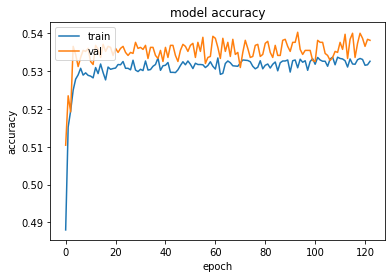

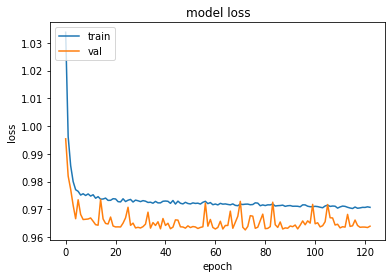

In [21]:
score = model01.evaluate(test_X01, test_y01, verbose=3)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

plt.plot(model01.history.history['accuracy'])
plt.plot(model01.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(model01.history.history['loss'])
plt.plot(model01.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Test Score: 0.9626468961889093
Test Accuracy: 0.5369318


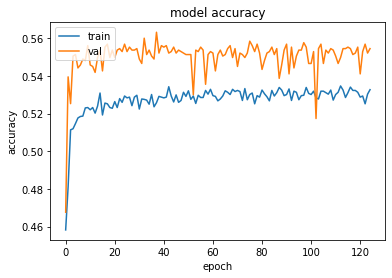

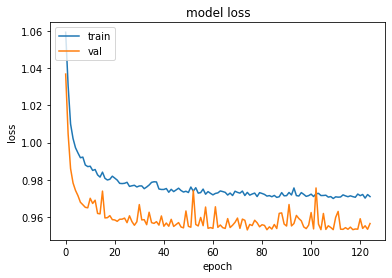

In [12]:
score = model02.evaluate(test_X02, test_y02, verbose=0)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

plt.plot(model02.history.history['accuracy'])
plt.plot(model02.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(model02.history.history['loss'])
plt.plot(model02.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Test Score: 0.9497374269095334
Test Accuracy: 0.52840906


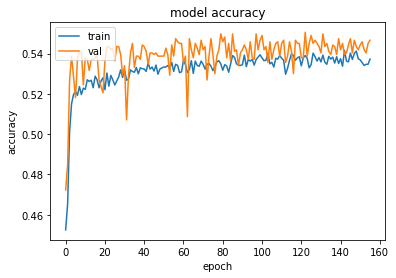

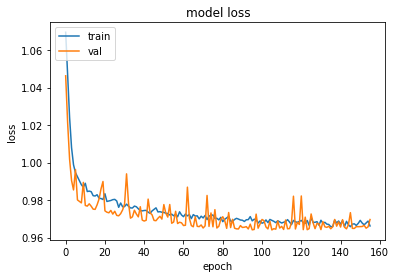

In [13]:
score = model03.evaluate(test_X03, test_y03, verbose=0)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

plt.plot(model03.history.history['accuracy'])
plt.plot(model03.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(model03.history.history['loss'])
plt.plot(model03.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [77]:
pred=model01.predict_proba(test_X01)
for i in range(len(test_X01)):
	print("X=%s, Predicted=%s" % (test_X01[i], pred[i]))

X=[0.07287755 0.10931633 0.10766002 0.03312616 0.06625232 0.23188312
 0.19875696 0.79502785 0.09937848 0.09937848 0.13250464 0.26500928
 0.36438777], Predicted=[0.24732108 0.32498783 0.4276911 ]
X=[0.0492895  0.11772969 0.19621615 0.1883675  0.06278917 0.06278917
 0.69068085 0.43952418 0.03139458 0.12557834 0.15697292 0.21976209
 0.37673501], Predicted=[0.15992394 0.24182431 0.59825176]
X=[0.07355546 0.1507284  0.19092264 0.16077696 0.12058272 0.12058272
 0.44213665 0.36174817 0.04019424 0.08038848 0.28135969 0.32155393
 0.60291361], Predicted=[0.22574636 0.25850546 0.5157481 ]
X=[0.06767031 0.11223369 0.11883567 0.19805945 0.06601982 0.06601982
 0.66019815 0.4291288  0.09902972 0.13203963 0.09902972 0.36310898
 0.36310898], Predicted=[0.29523665 0.2603286  0.4444348 ]
X=[0.03875857 0.10502322 0.13753041 0.02500553 0.07501659 0.15003318
 0.35007741 0.55012164 0.02500553 0.05001106 0.1750387  0.30006635
 0.62513823], Predicted=[0.20558925 0.27575174 0.51865906]
X=[0.05631773 0.10025146 

 0.36940734], Predicted=[0.04097474 0.11170878 0.84731656]
X=[0.06073792 0.12504866 0.19650503 0.21436913 0.10718456 0.03572819
 0.75029194 0.2858255  0.10718456 0.17864094 0.07145638 0.35728188
 0.25009731], Predicted=[0.18924826 0.23935726 0.57139444]
X=[0.05619474 0.12668179 0.17053318 0.06496502 0.09744753 0.16241255
 0.51972015 0.58468517 0.09744753 0.09744753 0.12993004 0.29234259
 0.42227262], Predicted=[0.18365417 0.2529474  0.5633984 ]
X=[0.09115047 0.10938056 0.10938056 0.14584075 0.         0.21876113
 0.36460188 0.65628338 0.07292038 0.07292038 0.21876113 0.2916815
 0.43752225], Predicted=[0.32403558 0.300527   0.3754375 ]
X=[0.22412305 0.1400769  0.06051322 0.07470768 0.03735384 0.26147689
 0.26147689 0.70972298 0.14941536 0.14941536 0.07470768 0.37353841
 0.29883073], Predicted=[0.67183506 0.18036075 0.1478041 ]
X=[0.02856659 0.18793808 0.57634344 0.17540887 0.05011682 0.02505841
 0.55128503 0.15035046 0.05011682 0.05011682 0.15035046 0.20046728
 0.45105139], Predicted=[0

 0.62479637], Predicted=[0.25818342 0.2707079  0.47110873]
X=[0.04423363 0.10841577 0.2023761  0.08673261 0.11564349 0.08673261
 0.4047522  0.43366307 0.02891087 0.02891087 0.23128697 0.26019784
 0.66495004], Predicted=[0.1639128  0.24718146 0.5889057 ]
X=[0.10139193 0.12868975 0.10256183 0.11699068 0.07799379 0.19498447
 0.23398137 0.62395032 0.07799379 0.19498447 0.11699068 0.42896584
 0.46796274], Predicted=[0.32029775 0.31187594 0.36782628]
X=[0.10140637 0.12980015 0.11682014 0.12168764 0.16225019 0.12168764
 0.36506293 0.44618803 0.12168764 0.12168764 0.16225019 0.48675057
 0.52731312], Predicted=[0.29497346 0.29147652 0.41355008]
X=[0.06474785 0.10020501 0.11099632 0.12332924 0.03083231 0.15416155
 0.40082003 0.46248465 0.06166462 0.06166462 0.18499386 0.36998772
 0.6166462 ], Predicted=[0.29841253 0.28120124 0.42038617]
X=[0.05081417 0.14115047 0.28230093 0.24701332 0.07057523 0.03528762
 0.6351771  0.24701332 0.17643808 0.         0.17643808 0.35287617
 0.4234514 ], Predicted=[

 0.67196388], Predicted=[0.2908024  0.28807464 0.42112294]
X=[0.0979954  0.10888378 0.10162486 0.07258918 0.21776755 0.07258918
 0.43553511 0.43553511 0.18147296 0.07258918 0.10888378 0.50812429
 0.4718297 ], Predicted=[0.3105005  0.28971097 0.39978853]
X=[0.06939585 0.08178797 0.06196058 0.09913693 0.0743527  0.0743527
 0.54525311 0.57003734 0.12392116 0.02478423 0.09913693 0.37176348
 0.42133195], Predicted=[0.347884   0.26833567 0.38378027]
X=[0.11936537 0.10610255 0.04588935 0.05305128 0.         0.21220511
 0.23873075 0.6896666  0.05305128 0.10610255 0.10610255 0.29178202
 0.53051277], Predicted=[0.5230938  0.25430924 0.22259693]
X=[0.04895534 0.10384465 0.1780194  0.0890097  0.0593398  0.1483495
 0.47471841 0.62306791 0.0593398  0.0593398  0.1780194  0.26702911
 0.44504851], Predicted=[0.17673567 0.26388097 0.55938333]
X=[0.07099249 0.10326181 0.1129426  0.12907726 0.12907726 0.06453863
 0.4195011  0.35496247 0.16134658 0.09680795 0.06453863 0.64538631
 0.4195011 ], Predicted=[0.

 0.46541355], Predicted=[0.30665833 0.32165304 0.37168866]
X=[0.1076653  0.12008822 0.12422919 0.20704866 0.08281946 0.12422919
 0.41409731 0.37268758 0.16563893 0.12422919 0.12422919 0.62114597
 0.37268758], Predicted=[0.3148149  0.29086608 0.39431912]
X=[0.08304456 0.10297526 0.09633169 0.09965348 0.1328713  0.09965348
 0.36539608 0.3986139  0.1328713  0.09965348 0.09965348 0.59792086
 0.49826738], Predicted=[0.27767962 0.2993319  0.42298847]
X=[0.06638975 0.11971922 0.17232313 0.10883566 0.18139276 0.07255711
 0.65301395 0.54417829 0.10883566 0.07255711 0.18139276 0.25394987
 0.25394987], Predicted=[0.22600046 0.24579597 0.5282036 ]
X=[0.06146102 0.13322476 0.15986972 0.21315962 0.0355266  0.10657981
 0.53289906 0.46184585 0.07105321 0.10657981 0.17763302 0.31973943
 0.49737245], Predicted=[0.2465205 0.2628609 0.4906185]
X=[0.07074562 0.12380483 0.12734211 0.07074562 0.07074562 0.21223685
 0.35372809 0.67208337 0.07074562 0.21223685 0.07074562 0.3891009
 0.35372809], Predicted=[0.22

In [78]:
pred=model02.predict_proba(test_X02)
for i in range(len(test_X02)):
	print("X=%s, Predicted=%s" % (test_X02[i], pred[i]))

X=[0.0071786  0.01590468 0.02149281 0.02579137 0.00859712 0.00859712
 0.06447843 0.02579137 0.49003607 0.2149281  0.41266195 0.20203241
 0.01719425 0.00859712 0.01719425 0.06877699 0.07307555 0.3395864
 0.19343529 0.520126   0.2493166 ], Predicted=[0.16144443 0.26124617 0.5773093 ]
X=[0.00498128 0.03306162 0.09257254 0.03967395 0.00440822 0.
 0.14547113 0.01763286 0.52898594 0.29094227 0.21159438 0.11461362
 0.02204108 0.00440822 0.01763286 0.05289859 0.05289859 0.55543524
 0.23804367 0.37910659 0.17192043], Predicted=[0.01179445 0.05263478 0.9355708 ]
X=[0.01361931 0.01404492 0.00978888 0.02553621 0.         0.01702414
 0.06809656 0.06384053 0.39581127 0.20003365 0.33622678 0.19152158
 0.01702414 0.00425604 0.02128018 0.08937674 0.06384053 0.49795611
 0.25110607 0.50221215 0.25961814], Predicted=[0.29754978 0.29575604 0.40669423]
X=[0.00899284 0.01187055 0.01035975 0.01079141 0.01079141 0.01438854
 0.0503599  0.0611513  0.345325   0.20503672 0.46043334 0.22661953
 0.01438854 0.0107914

 0.18861379 0.55829682 0.30555434], Predicted=[0.2671685  0.31814402 0.4146875 ]
X=[0.01568601 0.01422198 0.00857502 0.01673174 0.00418294 0.02091468
 0.05856109 0.06692697 0.35136657 0.20914677 0.44757408 0.21751264
 0.01673174 0.01254881 0.01254881 0.06274403 0.05437816 0.53959866
 0.28862254 0.38064711 0.22169557], Predicted=[0.46808484 0.2671423  0.26477286]
X=[0.00530461 0.01270566 0.01826438 0.00952924 0.01270566 0.00952924
 0.03176415 0.03176415 0.32081789 0.16199715 0.52728485 0.29858299
 0.00317641 0.00635283 0.0222349  0.02541132 0.05717547 0.30493582
 0.16834998 0.55269617 0.26364243], Predicted=[0.20878962 0.17680596 0.6144043 ]
X=[0.00775686 0.01662185 0.01994622 0.03545994 0.         0.00886499
 0.09751484 0.03102745 0.52303415 0.21719215 0.3678969  0.20832716
 0.02216246 0.01329748 0.00886499 0.04875742 0.05318991 0.45654676
 0.20832716 0.42551931 0.22162464], Predicted=[0.1807637  0.26123857 0.55799776]
X=[0.01358634 0.01099847 0.00617855 0.00323484 0.         0.0291135

In [79]:
pred=model03.predict_proba(test_X03)
for i in range(len(test_X03)):
	print("X=%s, Predicted=%s" % (test_X03[i], pred[i]))

X=[0.0166413  0.01331304 0.00852866 0.00832065 0.01248097 0.02080162
 0.04160324 0.05824454 0.40771177 0.20385589 0.45347534 0.23713848
 0.02080162 0.00832065 0.01248097 0.05408421 0.02912227 0.47011664
 0.27042107 0.41603242 0.22881783 0.00208016 0.00084905 0.00217558
 0.00102183 0.00239311 0.00083206 0.00228818 0.0005295 ], Predicted=[0.5616867  0.25275725 0.18555604]
X=[0.02394513 0.01473547 0.00596786 0.0110516  0.0110516  0.01473547
 0.04052253 0.055258   0.29470934 0.1436708  0.57099935 0.32049641
 0.01841933 0.0110516  0.00736773 0.0442064  0.04052253 0.39417375
 0.22471587 0.43838015 0.23576747 0.00179589 0.00103904 0.00206772
 0.00063515 0.00210015 0.0007247  0.00198124 0.00063316], Predicted=[0.65994745 0.21574806 0.12430447]
X=[0.010265   0.01401733 0.01466428 0.00431302 0.01293907 0.02587814
 0.03019117 0.06469536 0.40973727 0.20702515 0.46149356 0.21565119
 0.0172521  0.00431302 0.02156512 0.06469536 0.06038233 0.38385913
 0.25446841 0.50031077 0.22859027 0.00217921 0.0006

 9.41781425e-04], Predicted=[0.22252192 0.28313297 0.49434516]
X=[3.43684647e-02 2.00482711e-02 5.07889534e-03 2.67310281e-02
 7.63743661e-03 3.81871830e-03 9.92866759e-02 4.20059013e-02
 4.23877732e-01 2.55854126e-01 4.50608760e-01 2.48216690e-01
 3.43684647e-02 3.81871830e-03 0.00000000e+00 1.14561549e-01
 1.14561549e-02 5.61351590e-01 3.09316183e-01 2.06210788e-01
 9.16492393e-02 2.30499213e-03 1.48189068e-03 2.10353127e-03
 6.46244636e-04 2.10419172e-03 1.41434011e-03 1.69720813e-03
 4.77339788e-04], Predicted=[0.78640383 0.14141029 0.07218584]
X=[1.23276368e-02 1.25202561e-02 8.86048895e-03 1.92619325e-02
 1.15571595e-02 7.70477300e-03 5.39334110e-02 2.69667055e-02
 4.58433993e-01 1.81062165e-01 5.39334110e-01 2.77371828e-01
 2.69667055e-02 7.70477300e-03 3.85238650e-03 8.86048895e-02
 3.85238650e-02 4.50729220e-01 2.65814668e-01 2.77371828e-01
 1.54095460e-01 1.52153080e-03 1.14751938e-03 1.98122734e-03
 3.74537576e-04 2.27192024e-03 1.28412883e-03 2.14021472e-03
 9.63096625e-04]